<a href="https://colab.research.google.com/github/jihyunjeongme/data-analysis-kaggle/blob/master/%5BKaggle_Titanic%5D_EDA_To_prediction(DieTanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고 - EDA To Prediction(DieTanic)
- https://www.kaggle.com/ash316/eda-to-prediction-dietanic
- https://kaggle-kr.tistory.com/17?category=868316

In [0]:
# 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn')
# plt.style.use('fivethirtyeight')
sns.set(font_scale=2.5)
# 위 두줄은 matplotlib의 기본 scheme말고 seavorn scheme을 세팅하고, 
# 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용하면 편합니다.

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# test, traing set 데이터 불러오기

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/Colab Notebooks/dataanalysis/kaggle/Titanic

/content/gdrive/My Drive/Colab Notebooks/dataanalysis/kaggle/Titanic


In [4]:
df_train=pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.shape

(891, 12)

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

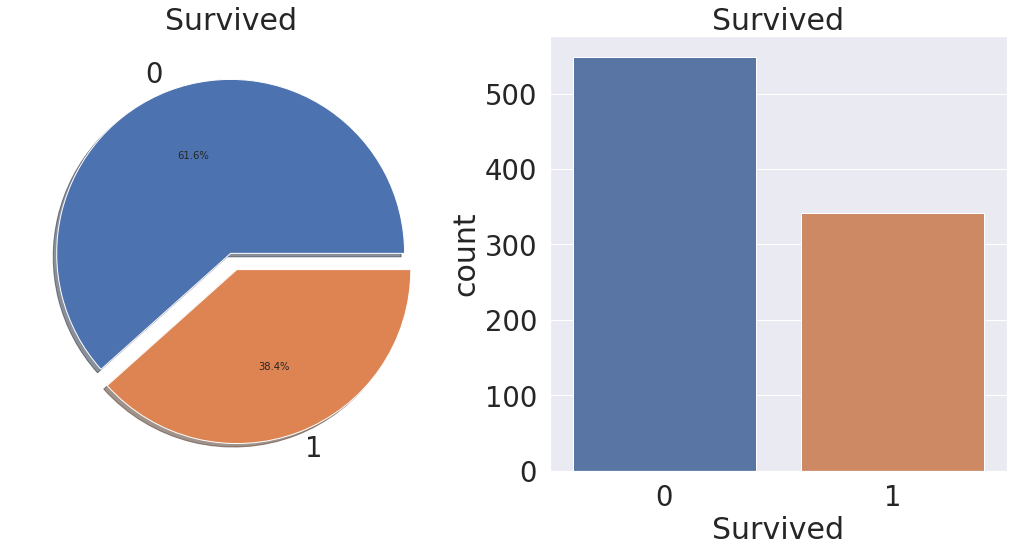

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [0]:
# 1: 살아남음, 0: 죽음
# 38.4% 가 살아남음

In [0]:
# EDA
# Pclass
# categorial(범주형이면서 순서가 있음)

In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


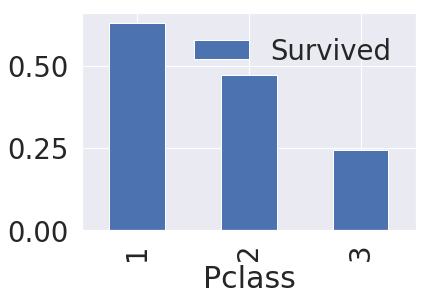

In [14]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

In [0]:
# 위에 보다 시피 Pclass가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있습니다.

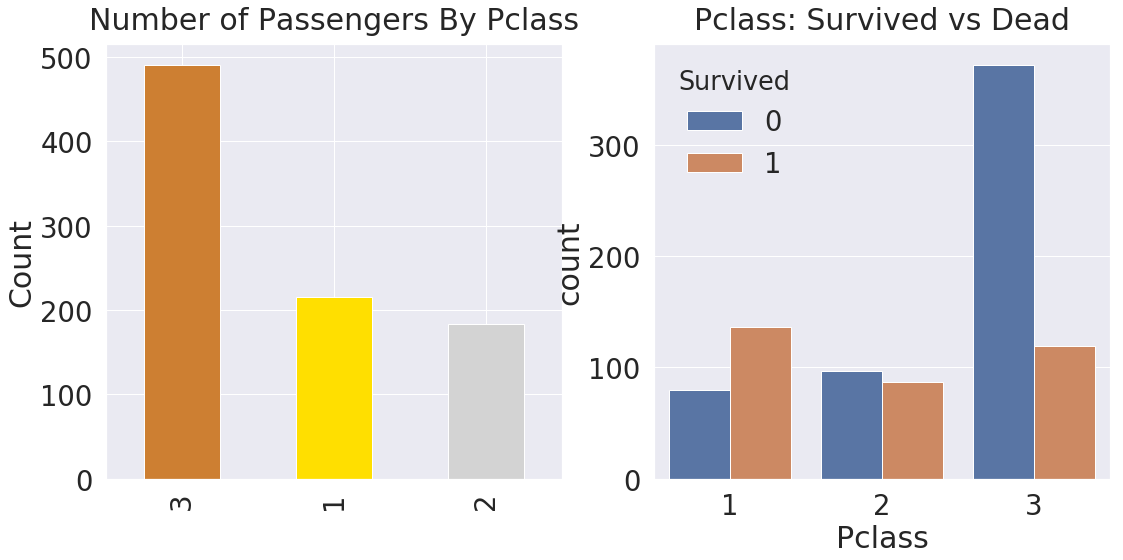

In [16]:
# seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해볼 수 있습니다.

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


In [0]:
# 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 
# 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있습니다.

In [0]:
# Sex
# 이번에는 성별로 생존률이 어떻게 달라지는지 확인해보겠습니다.
# pandas groupby와 seaborn countplot을 사용하여 시각화해봅시다.

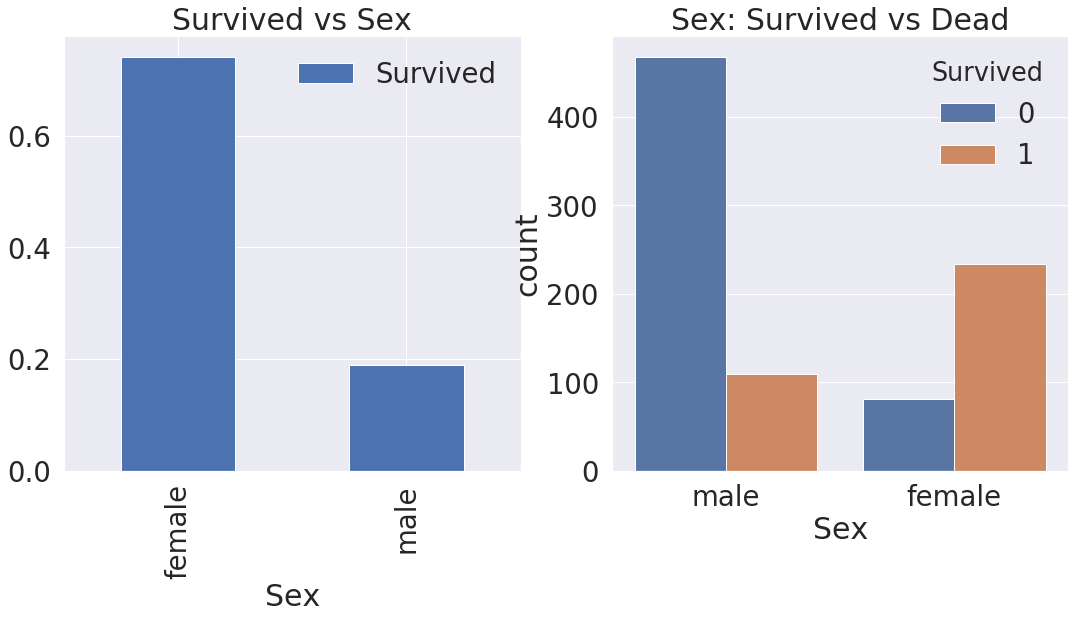

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].set_title('Survived vs Sex')
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])

ax[1].set_title('Sex: Survived vs Dead')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
plt.show()

In [20]:
# 보시다 시피, 여자가 생존할 확률이 높다.

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [0]:
# Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature 임을 알 수 있음.

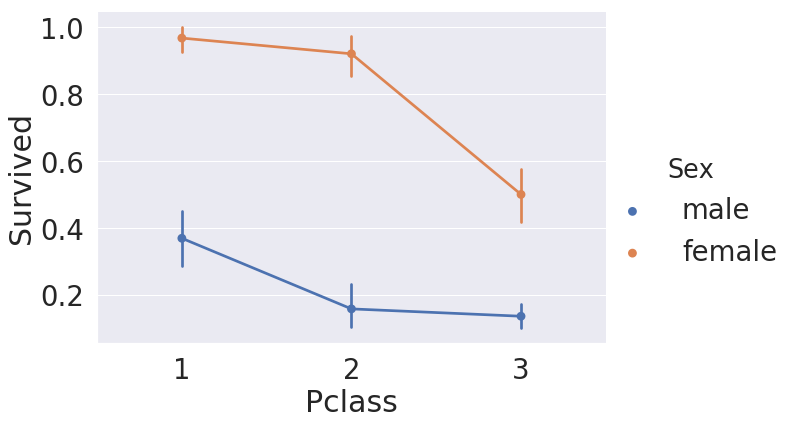

In [23]:
# Both Sex and Pclass
# Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인
# seaborn의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있음.

sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

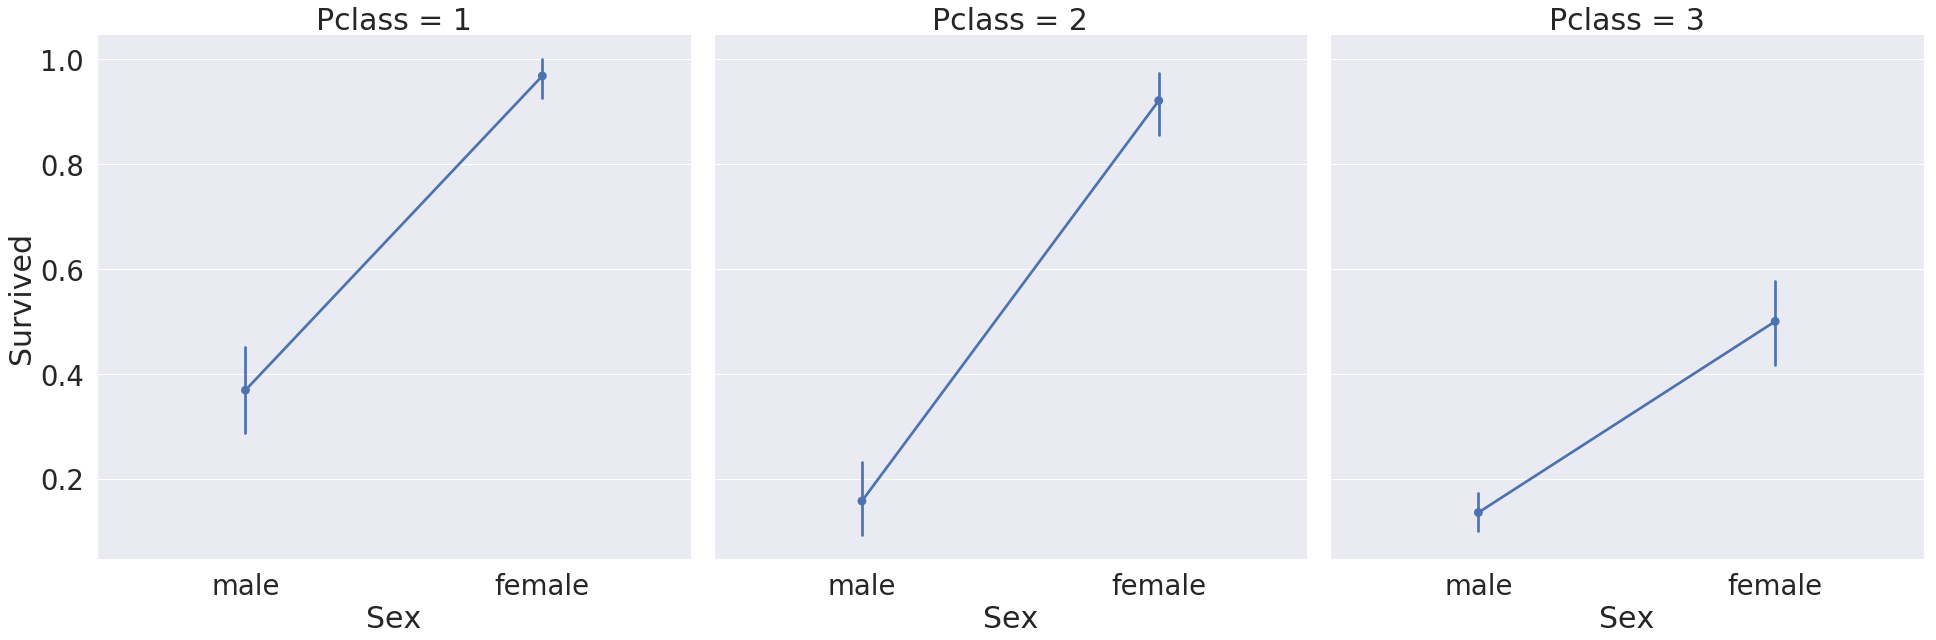

In [24]:
# 모든 클래스에서 female이 살 확률이 male 보다 높은 걸 알 수 있음.
# 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높음.
# 위 그래프는 hue 대신 column으로 하면 아래와 같아짐


sns.factorplot(x='Sex', y='Survived', col='Pclass',data=df_train, satureation=.5,
size=9, aspect=1)
              

In [25]:
# Age
# 이번에는 Age feature를 살펴봅시다.

print("제일 나이 많은 탑승객: {:.1f} Years".format(df_train['Age'].max()))
print("제일 어린 탑승객: {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이: {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


In [0]:
# 생존에 따른 Age의 histogram을 그려보겠습니다.

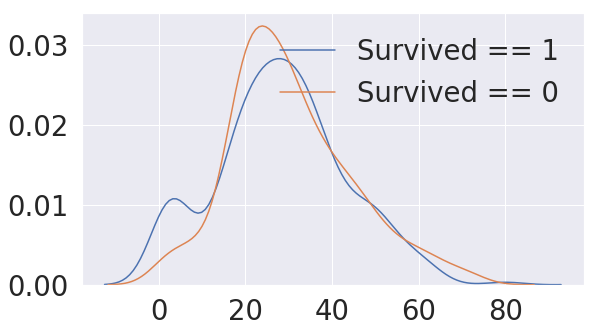

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

In [0]:
# 생존자가 나이가 어린 경우가 많음

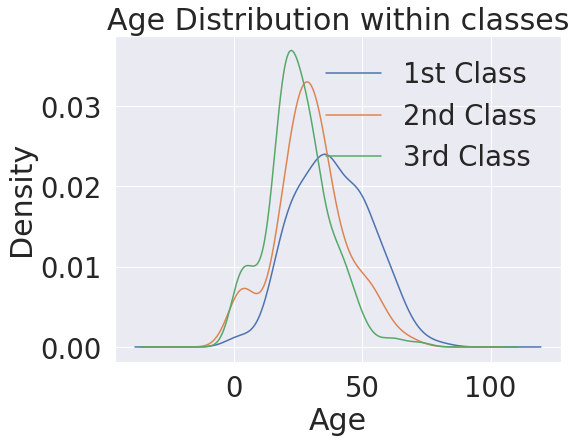

In [29]:
# Age distribution within classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])


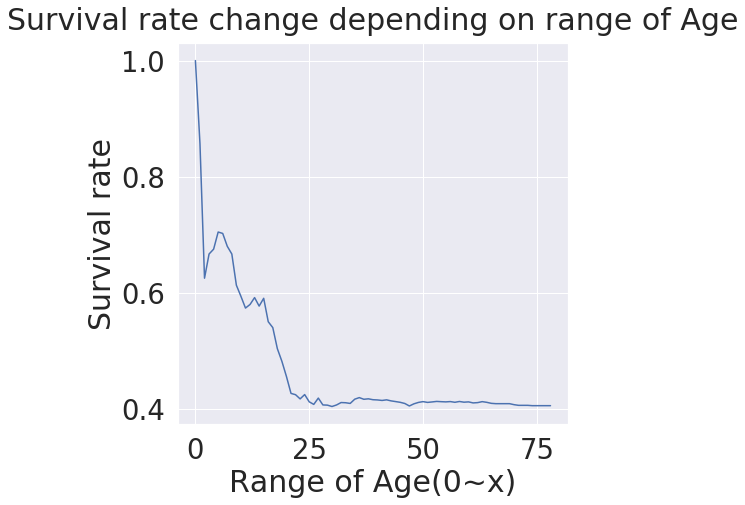

In [30]:
# Class가 높을 수록 나이 많은 사람의 비중이 커짐
# 나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.
# 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)

plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [0]:
# 나이가 어릴 수록 생존률이 확실히 높은 것을 확인 
# 나이가 중요한 feature로 쓰일 수 있음을 확인

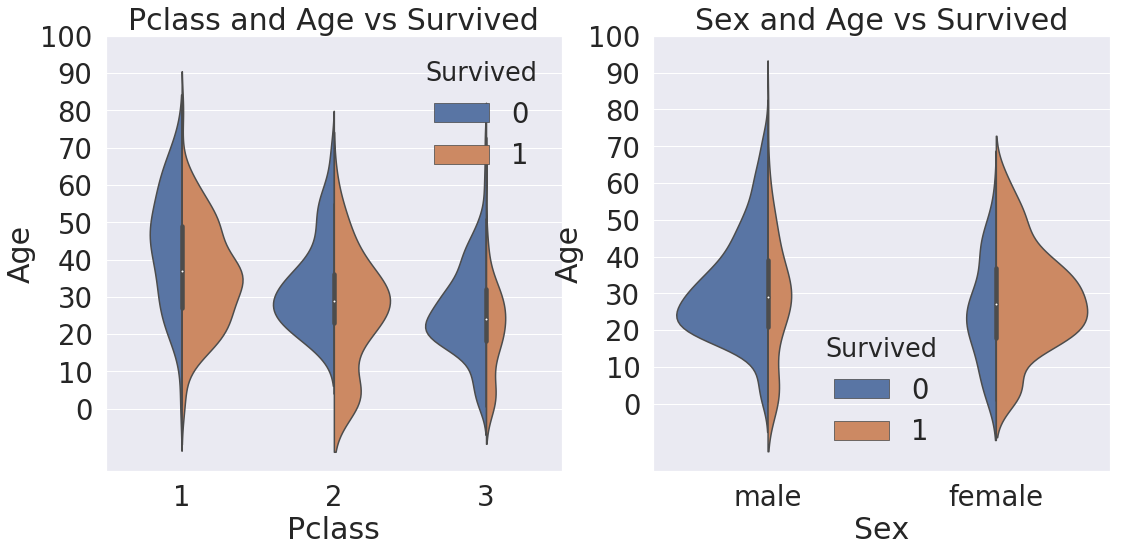

In [32]:
# Pclass, Sex, Age
# 지금까지 본 Sex, Pclass, Age, Survived 모두에 대해서 보고싶음.
# 이를 쉽게 그려주는 것이 seaborn의 violinplot 입니다.
# x 축은 우리가 나눠서 보고싶어하는 case(여시선 Pclass, Sex)를 나타내고, 
# y 축은 보고싶은 하는 distribution(Age)

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [0]:
# 왼쪽 그림은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 따라 구분
# 오른쪽 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프
# 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있음.
# 명확히 여자가 생존을 많이 한 것을 볼 수 있음.

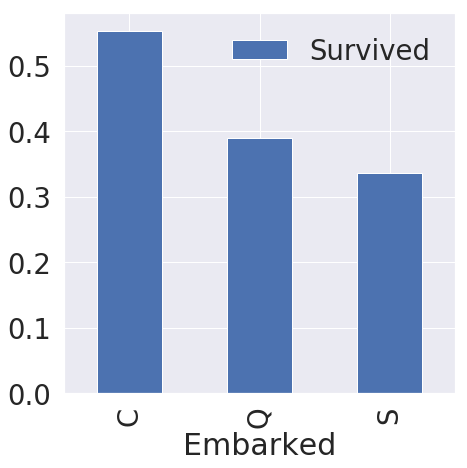

In [34]:
# Embarked
# Embarked 는 탑승한 항구를 나타냅니다.
# 탑승한 곳에 따른 생존률을 보겠습니다.

f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [0]:
# 조금의 차이는 있지만 생존률은 좀 비슷한 거 같음. 그래도 C가 제일 높음
# 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용
# 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역활을 했는지 확인 해 볼 수 있음.
# 추후에 모델을 만들고 난 다음에 살펴볼 것임.
# 다른 feature로 split 하여 한번 살펴보겠습니다.

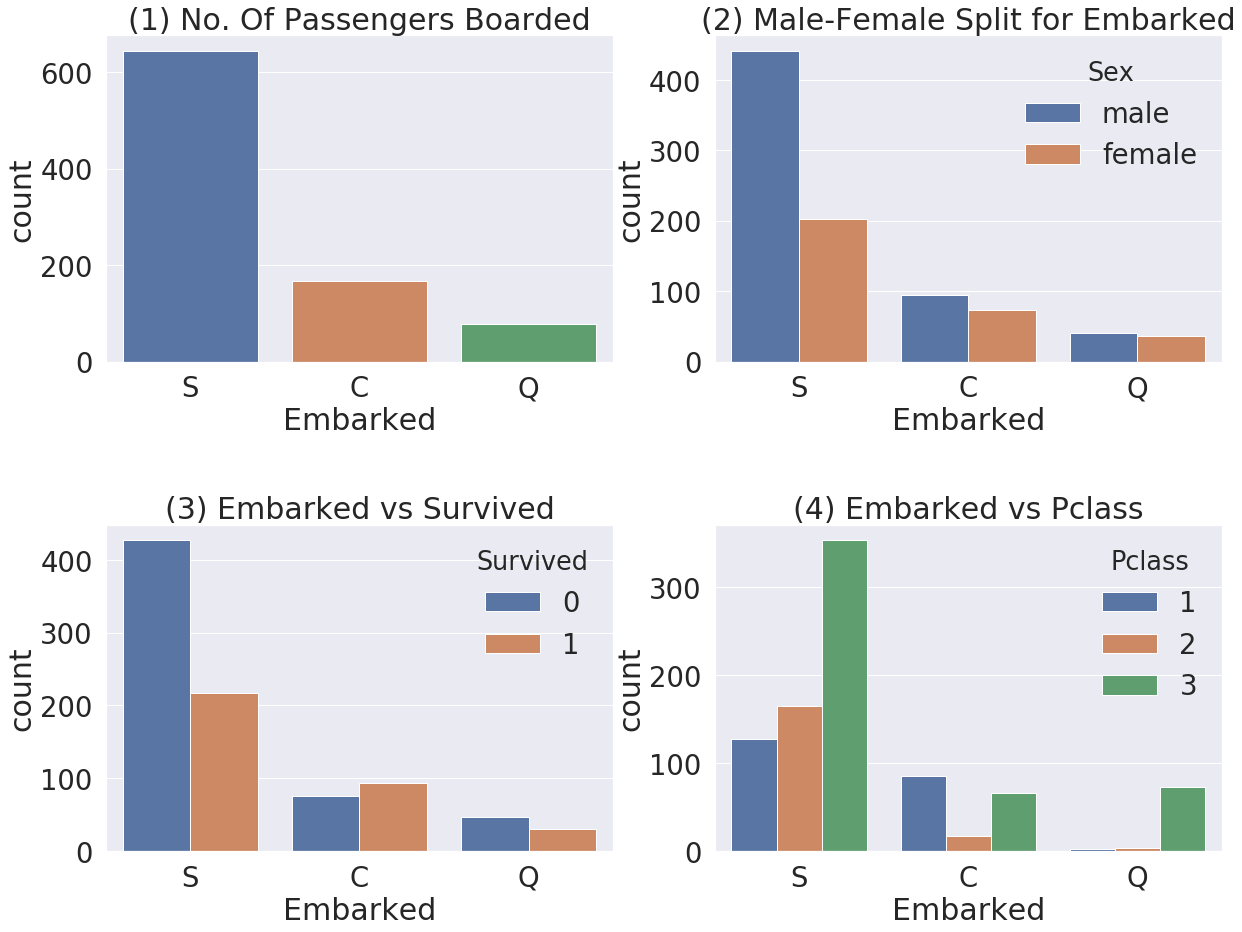

In [36]:
f,ax=plt.subplots(2, 2, figsize=(20,15))

ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', data=df_train, ax=ax[0,0]) # 왼쪽 첫번째

ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])

ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])

ax[1,1].set_title('(4) Embarked vs Pclass')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [0]:
# S에서 가장 많은 사람이 탑승
# C와 Q는 남녀 비율이 비슷, S는 남자가 더 많음
# 생존확률이 S 경우 많이 낮음
# C가 생존 확률이 높은건 Pclass가 높은 사람이 많이 타서 그렇고, S는 3rd class가 많아서 생존확률이 낮게 나옴.

In [0]:
# Family - SibSp(형제 자매) + Parch(부모, 자녀)
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [39]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


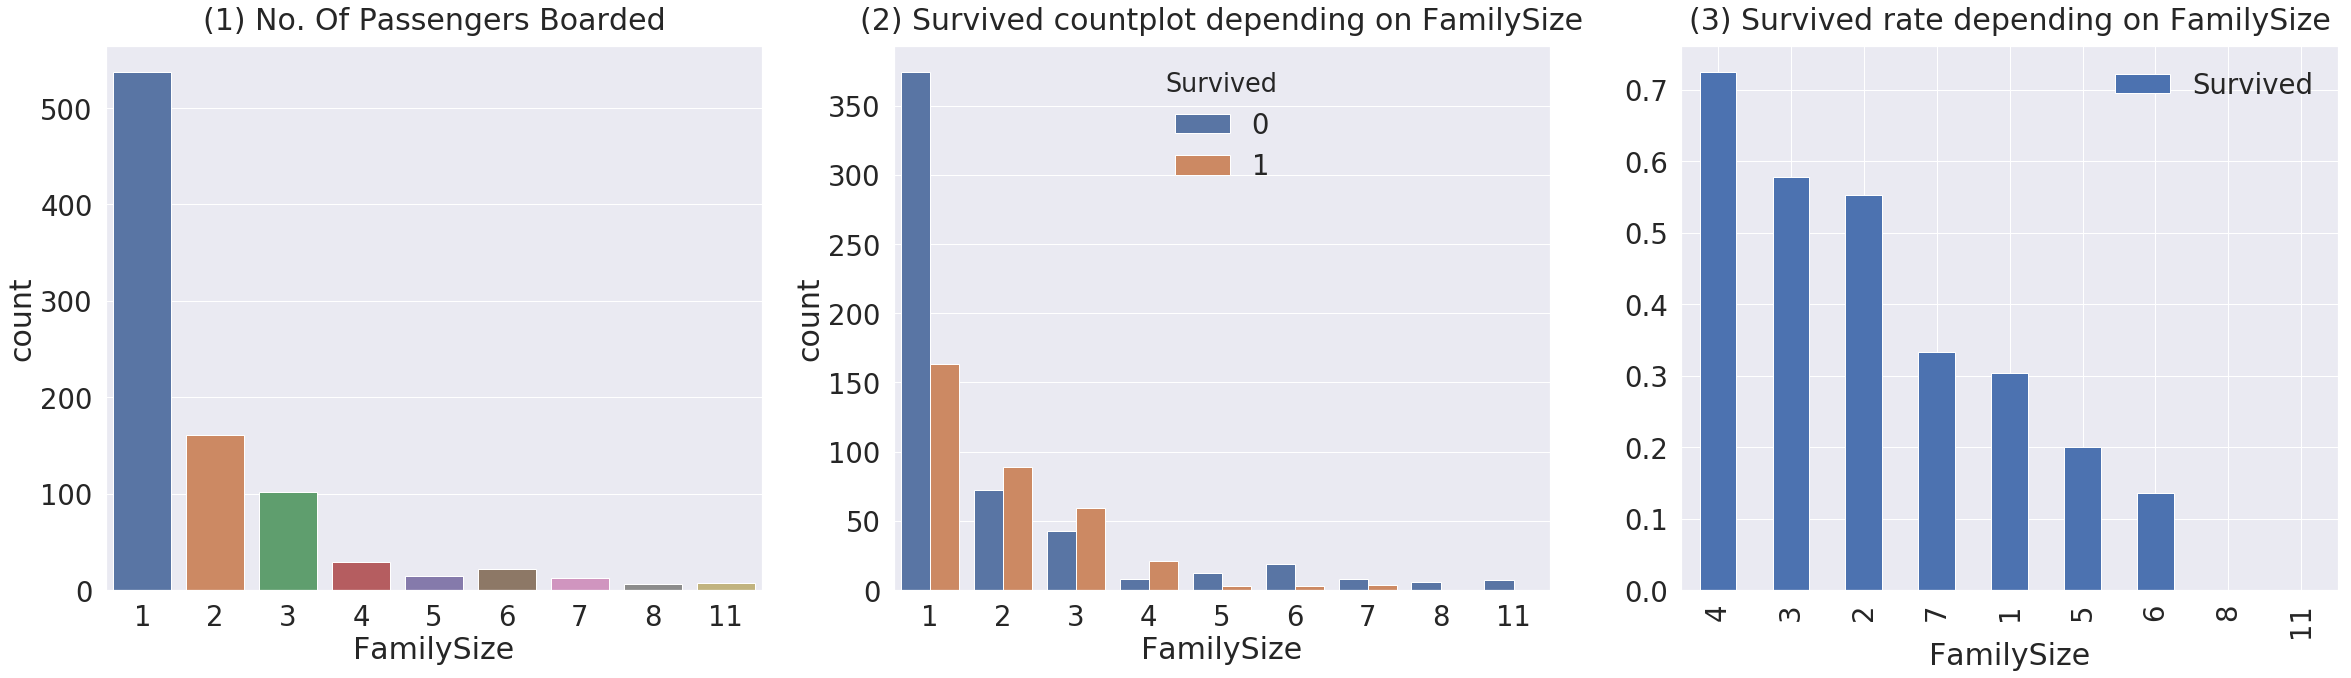

In [40]:
# FamilySize와 생존의 관계를 한번 살펴봅시다.
f, ax=plt.subplots(1, 3, figsize=(40,10))

ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)
sns.countplot('FamilySize', data=df_train, ax=ax[0])

ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])

ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [0]:
# Figure(1) - 가족 크기가 1~11까지 있음. 대부분 1명
# Figure(2), (3) - 가족 크기에 따른 생존비교, 가족이 4명인 경우가 가장 생존확률이 높음
# 3~4명 선에서 생존확률이 높음

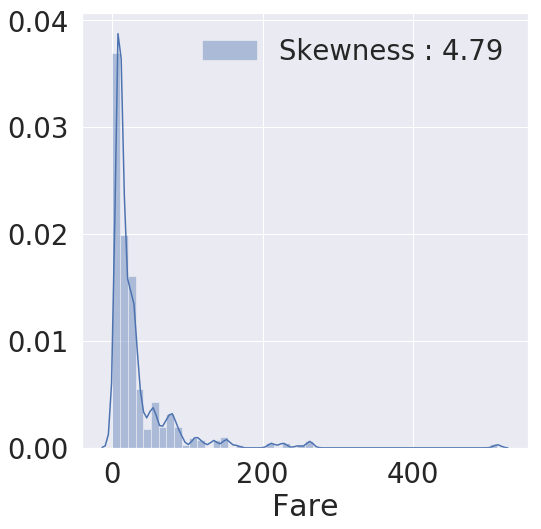

In [42]:
# Fare
# 탑승요금이며, contious feature
# historygram을 그려봄

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label=
               'Skewness : {:.2f}'.format(df_train['Fare'].skew()),
               ax=ax)
g = g.legend(loc='best')

In [0]:
# distribution이 매우 비대칭(high skewness)
# 이대로 모델을 넣어줄 경우 자칫 모델이 잘못 학습 할 수 있음.
# outlier의 영향을 줄이기 위해 Fare에 log를 취함
# pandas의 유용한 기능, dataFrame의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면
# map, 또는 apply를 사용하면 매우 손쉽게 적용 가능

# 우리가 원하는 것 Fare columns의 데이터 모두를 log 값 취하는 것
# lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면
# Fare columns 데이터에 그대로 적용 됨

In [0]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
# testset에 있는 nan value를 평균값으로 치환함

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)


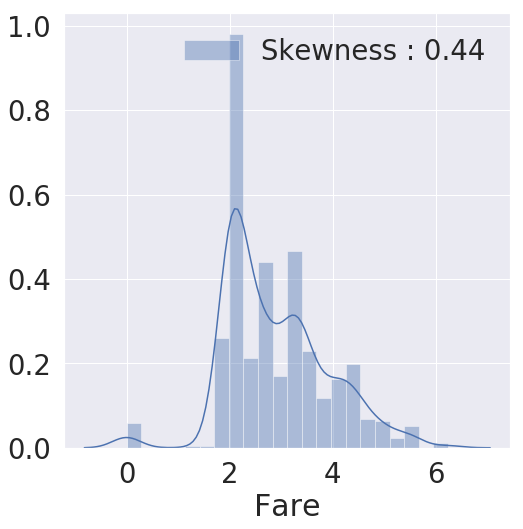

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [0]:
# log를 취하니, 비대칭성이 많이 사라짐
# 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있음.
# 위와 같은 작업을 feature engineering 이라고 함

In [0]:
# Cabin
# NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않음.
# 그러므로 우리가 세유려는 모델에 포함시키지 않도록 함

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [49]:
# Ticket
# 이 feature는 NaN은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 
# 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요함.

df_train['Ticket'].value_counts()

347082             7
1601               7
CA. 2343           7
347088             6
3101295            6
CA 2144            6
S.O.C. 14879       5
382652             5
W./C. 6608         4
19950              4
4133               4
17421              4
2666               4
113760             4
LINE               4
PC 17757           4
347077             4
113781             4
349909             4
PC 17582           3
345773             3
35273              3
110413             3
PC 17572           3
248727             3
347742             3
230080             3
363291             3
F.C.C. 13529       3
SC/Paris 2123      3
                  ..
315151             1
349215             1
29108              1
A/5 2466           1
28228              1
230434             1
A/5 21173          1
SOTON/OQ 392086    1
341826             1
347073             1
PC 17600           1
111426             1
35852              1
A/5 3594           1
248731             1
349242             1
248723       

In [0]:
# 보시다 시피, ticket number는 매우 다양
# 여기서 어떤 특징을 이끌어내서 생존과 연결 시킬 수 있을까요?
# 이 튜토리얼에서는 튜토리얼이니 일단 ticket은 넘기도록 하겠습니다.

In [0]:
# 3. Feature engineering
# 가장먼저 dataset에 존재하는 null data를 채움
# null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어를 찾아서

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()



In [0]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fre'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [0]:
# 3.1 Fill Null
# 3.1.1 Fill Null in Age using title

# Age에는 null data가 177개나 있음. 
# 우리는 title + statistics를 사용

# 영어에서는 Miss, Mrr, Mrs 같은 title이 존재함
# 각 탑승객의 이름에는 꼭 이런 title이 들어가게 되는데 이를 사용

# pandas series에는 data를 string으로 바꿔주는 str method, 거기에 정규표현식을 적용하게
# 해주는 extract method가 있음. 이를 사용하여 title을 쉽게 추출 할 수 있음.
# title을 Initial column에 저장

# df_train.head()
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') # lets extract the Saluttations

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.') # lets extract the Saluttations


In [59]:
# pandas의 crosstab을 이용하여 우리가 추출할 Initial과 Sex간의 count를 살펴봄

pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') 
# checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
# 위 테이블을 참고하여, 남자, 여자가 쓰는 initial을 구분해 보겠습니다. 
# replace 메소드를 사용하면, 특정 데이터 값을 원하는 값으로 치환해줌

In [0]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [62]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,1.190112,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,1.085686,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,0.932798,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,1.207905,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,0.958425,1.222222


In [0]:
# 여성과 관계 있는 Miss, Mr, Mrs가 생존률이 높은 것을 볼 수 있음.

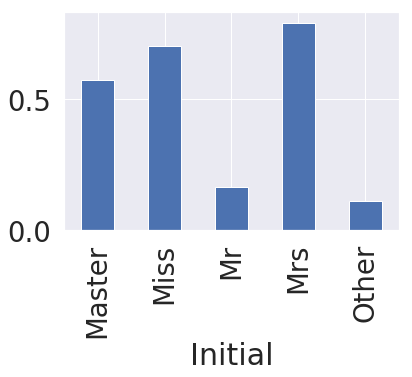

In [64]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [65]:
# 이제 본격적으로 Null을 채울 것 입니다. Null data를 채우는 방법은 정말 많음
# statistics를 활용, null data가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식
# 여기서는 statistics를 활용하는 방법을 사용

# 여기서 statistics는 train data의 것을 의미함.
# 우리는 얹나 test를 unseen으로 둔 상태로 놔둬야 하며, train에서 얻은 statistics를 기반으로 test의 null data를 채워줘야 함.

df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,1.190112,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,1.085686,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,0.932798,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,1.207905,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,0.958425,1.222222


In [0]:
# Age의 평균을 이용해 Null value를 채움
# Pandas dataframe을 다룰 떄에는 boolean arrary를 이용해 indexing 하는 방법이 참으로 편리합니다.
# 아래 코드 첫줄을 해석하자면, isnull() 이면서 Initial이 Mr인 조건을 만족하는 row(탑승객)의 
#'Age'의 값을 33으로 치환한다 입니다.
# loc + boolean + column 을 사용해 값을 치환하는 방법은 자주쓰이므로 꼭 익숙해집시다.

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [0]:
# 여기선 간단하게 Null을 채웠지만, 좀 더 다양한 방법을 쓴 예시들이 다른 커널에 존재합니다.
# https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 보시면서 공부해보세요!
# 이 외에도 다른 캐글러들의 커널을 보며 여러 참신한 아이디어를 살펴보세요!



In [69]:
# 3.1.2 Fill Null in Embarked

print('Embarked has ', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has  2 Null values


In [0]:
# Embarked는 Null value가 2개이고, S에서 가장 많은 탑승객이 있었으므로, 간단하게 Null을 S로 채우겠습니다.
# dataframe의 fillna method를 이용하면 쉽게 채울 수 있습니다. 여기서 inplace=True로 하면 df_train에
# fillna를 실제로 적용하게 됩니다.

df_train['Embarked'].fillna('S', inplace=True)

In [0]:
# 3.2 Change Age(continuous to categorical)

# Age는 현재 continuous feature 입니다. 이대로 써도 모델을 세울 수 있지만, Age를 몇개 group으로
# 나누어 category 화 시켜 줄 수 도 있습니다. continuous를 categorical로 바꾸면 자칫 information loss가 생길 수도 있습니다만,
# 본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.

# 방법은 여러가지가 있습니다. dataframe의 indexing 방법인 loc를 사용하여 직접해줄 수 있고,
# 아니면 apply를 사용해 함수를 넣어 줄 수 있습니다.

# 첫번째로 loc를 사용한 방법입니다. loc는 자주쓰게 되므로 그 사용법을 숙지하시면 좋습니다.
# 나이는 10살 간격으로 나누겠습니다.

df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
             
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7
             
df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7
             
             
             
             

In [0]:
# 두번째로 간단한 함수를 만들어 apply 메소드에 넣어주는 방법
# 훨씬 수월함

def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
      
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)


In [76]:
# 두가지 방법이 잘 적용됫다면, 둘다 같은 결과를 내야함.
# 이를 확인하기 위해 Series 간 boolean 비교 후 all() 메소드를 사용합시다.
# all() 메소드는 모든 값이 True면 True, 하나라도 False가 있으면 False를 줍니다.

print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->', 
      (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> True


In [0]:
# 보시다 시피 True 입니다. 둘 중 편한 걸 선택
# 이제 중복되는 Age_cat 컬럼과 원래 컬럼 Age를 제거

df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [0]:
# 3.3 Change Initial, Embakred and Sex(string to numerical)

# 현재 Initial은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다. 
# 이러 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 떄 우리가 해야 할 것은 먼저
# 컴퓨터가 인식할 수 있도록 수치화 시켜야 합니다.

# map method를 가지고 간단히 할 수 있습니다.
# 사전 순서대로 정리하여 mapping 하겠습니다.

df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr':2, 
                                               'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 
                                             'Mrs': 3, 'Other': 4})

In [79]:
# Embarked도 C, Q, S로 이루어져 있습니다. map을 이용해 바꿔봅시다.
# 그러기에 앞서서, 특정 column에 어떤 값들이 있는지 확인해보는 방법을 잠깐 살펴보겠습니다.
# 간단히 unique() 메소드를 쓰거나, value_counts()를 써서 count까지 보는 방법이 있습니다.

df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [80]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
# 위 두 방법을 사용해 Embarked가 S, C, Q 세가지로 이루어진 것을 볼 수 있습니다. 이제 map을 사용해봅시다.

df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [82]:
# 한번 Null이 사라졌는지 확인해봅시다. Embarked Coulumn만 가져온 것은 하나의 pandas의 Series 객체이므로,
# isnull() 메소드를 사용해 Series의 값들이 null 인지 아닌지에 대한 boolean 값을 얻을 수 있습니다.
# 그리고 이것에 any()를 사용하여, True가 단 하나라도 있을 시(Null이 한개라도 있을 시) True를 반환해주게 됩니다.
# 우리는 Null을 S로 다 바꿔 주었으므로 False를 얻게 됩니다.

df_train['Embarked'].isnull().any()

False

In [0]:
# Sex도 Femal, male로 이루어져 있습니다. map을 이용해 바꿔봅시다.

df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

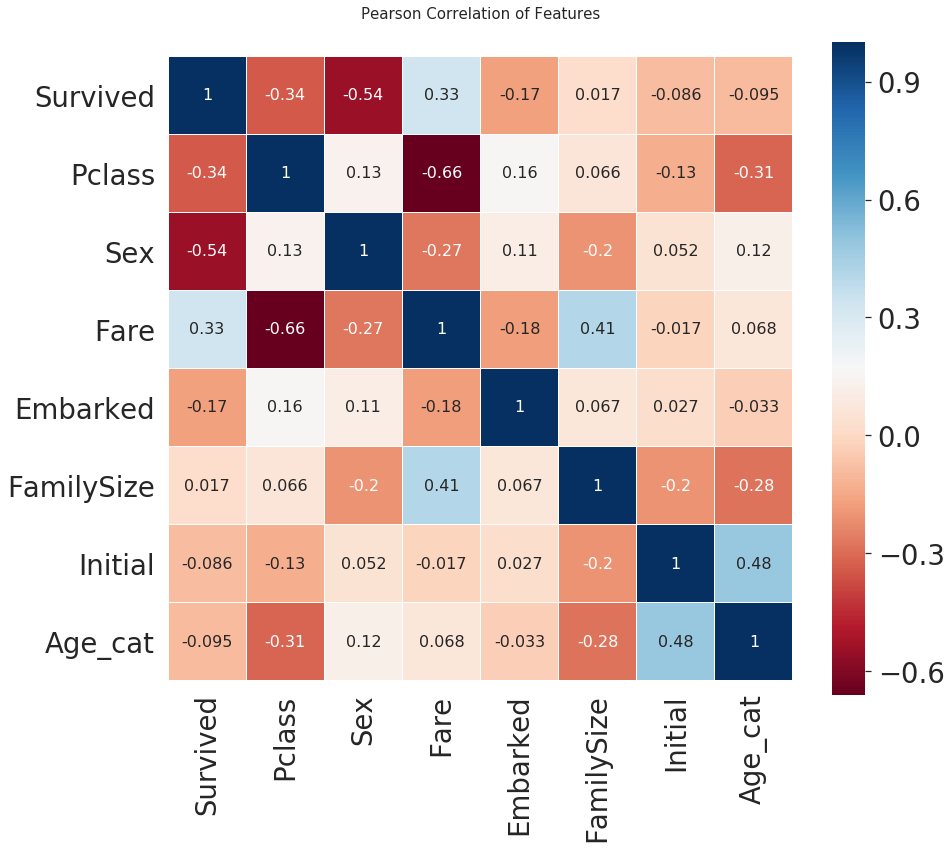

In [85]:
# 이제 각 feature 간의 상관관계를 한번 보려고 함.
# 두 변수간의 Pearson correclation을 구하면 (-1, 1) 사이의 값을 얻을 수 있음.
# -1로 갈 수록 음의 상관관계, 1로 갈수 록 양의 상관관계를 의미, 0은 상관관계가 없다는 것을 의미함.

# 우리는 여러 feature를 가지고 있으니 이를 하나의 maxtrix 형태로 보면 편할 텐데, 이를 heatmap plot이라고 하며, 
# dateframe의 corr() 메소드와 seaborn을 가지고 편하게 그릴 수 있습니다.

heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked'
                         , 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True
           , annot_kws={"size": 16})

del heatmap_data

In [0]:
# EDA에서 살펴봤듯이, Sex와 Pclass가 Survived에 상관관계까 어느 정도 있음.
# 생각보다 fare와 Embarked도 상관관계 있음.
# 또한 우리가 여기서 얻을 수 있는 정보는 서로 강한 상관관계를 가지는 feature들이 없다는 것.
# 이것은 우리가 모델을 학습시킬 때, 불필요한 feature가 없다는 것을 의미. 
# 1 또는 -1의 상관관계를 가진 feature A, B가 있다면, 우리가 얻을 수 있는 정보는 사실 하나 임
# 이제 실제로 모델을 학습시키기 앞서서 data preprocessing (전처리)을 진행해보겠습니다.

In [0]:
# 3.4 one-hot encoding on Initial and Embarked

# 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 서능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.
# 수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4로 매핑해주는 것을 말합니다.
# One-hot encoding은 위 카테고리를 아래와 같이 (0,1)로 이루어진 5차원의 벡터로 나타내는 것을 말합니다.

# pandas의 get_dummies를 사용하여 쉽게 해결 할 수 있습니다.
# 총 5개의 카테고리니, one-hot encoding을 하고 나면 새로운 5개의 column이 생겨납니다.
# Initial을 prefix로 두어서 구분이 쉽게 만들어줍니다.

df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [90]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0.683603,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1.450832,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0.727559,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1.379314,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0.735091,NaN,2,1,3,0,0,1,0,0


In [0]:
# 보시다시피 오른쪽에 우리가 만들려고 했던 one-hot encoded columns가 생성된 것이 보입니다.
# Embarked에도 적용하겠습니다. Initial 떄와 마찬가지로 one-hot encoding을 사용해 표현하겠습니다.

df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [92]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0.683603,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1.450832,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0.727559,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1.379314,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0.735091,NaN,1,3,0,0,1,0,0,0,0,1


In [0]:
# 아주 쉽게 one-hot encoding을 적용했습니다.
# sklearn로 Labelencoder + OneHotencoder 이용해도 one-hot encoding이 가능합니다.
# 다른 튜토리얼에서 한번 써보겠습니다. 여기서는 get_dummies로 충분히 가능하기 때문에 get_dummies 만
# category가 100개가 넘어가는 경우가 있음. 이때 one-hot encoding을 사용하면
# column이 100가 생겨, 학습시 매우 버거울 경우가 있음. 이런 경우는 다른 방법을 사용해야 함.

In [0]:
# 3.5 Drop columns

# 이제 필요한 Columns만 남기고 다 지움.

df_train.drop(['PassengerId',])